# Important note! 

First the code is run by loading the dataset and making 3 predictive models. At the end, after the AUC and F2-SCORE calculations, a feature importance graph is generated from the Random Forest classifeir. The top 15 features are selected, new data split/oversample is done and the three models are built a second time (this time with only the top 15 features). This is done to verify whether the selected features and reduced dimensionality have a positive effect on the predicitve models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn import metrics 
from sklearn import ensemble
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import cohen_kappa_score


In [2]:
#pip install sklearn

In [3]:
#pip install hyperopt

# Load dataset

In [4]:
df = pd.read_csv('ML_Training_Dataset.csv')

In [5]:
df = df.drop(['Unnamed: 0','puuid'], axis=1)

In [6]:
df["Churner"] = df["Churner"].astype(int)
df
# 0 equals to "Not Churned" and 1 equals to "Churned"

,assists,deaths,kills,bountyLevel,champExperience,champLevel,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,...,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,teamEarlySurrendered,win,freshBlood,hotStreak,Churner
0,-3.41,-2.22,0.72,0.29,93.04,0.32,4064.62,4859.78,4064.62,10458.26,...,10.71,-3.90,14.61,-1.30,-12.45,0.00,-1.19,0.0,0.0,0
1,0.84,0.27,-1.92,-0.04,-885.29,-0.31,-688.18,-1119.77,-688.18,20035.11,...,6.25,-25.00,-4.17,0.00,8.33,0.00,-6.25,0.0,0.0,0
2,-3.54,-2.08,-1.14,0.29,97.28,0.55,2261.36,4072.41,2261.36,-3678.36,...,5.13,-11.54,3.20,0.00,-10.25,0.00,-8.33,0.0,0.0,0
3,-0.47,-0.63,-1.74,0.62,-1722.50,-0.73,-1448.11,-1922.69,-1448.11,-2029.27,...,5.21,10.42,-2.08,0.00,0.00,0.00,-14.58,0.0,0.0,0
4,-1.82,1.93,-0.42,-0.29,-486.78,-0.26,-399.25,-662.98,-399.25,-343.31,...,7.18,-10.34,-1.15,-1.15,8.04,-1.15,-29.02,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6.62,0.36,-1.77,-0.54,1867.60,1.44,-141.69,-1108.35,-141.69,-7390.51,...,-5.15,-9.28,3.18,0.00,-15.29,0.00,-1.55,0.0,0.0,0
361,-0.55,-0.57,-0.91,-0.11,-777.30,-0.21,-115.28,-2285.18,-115.28,-3643.87,...,3.19,-2.25,4.78,0.00,-8.24,0.00,-3.27,0.0,0.0,0
362,-1.11,-0.43,-1.17,-0.22,-522.24,-0.19,415.66,-1377.69,415.66,-6088.51,...,5.31,-2.27,-1.51,0.00,-7.19,0.00,-6.06,0.0,0.0,1
363,-0.20,0.81,1.55,0.66,776.90,0.00,51.48,3602.54,51.48,-1044.26,...,14.86,2.53,-2.90,0.00,34.79,0.00,5.07,0.0,0.0,0


In [7]:
df

,assists,deaths,kills,bountyLevel,champExperience,champLevel,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,...,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,teamEarlySurrendered,win,freshBlood,hotStreak,Churner
0,-3.41,-2.22,0.72,0.29,93.04,0.32,4064.62,4859.78,4064.62,10458.26,...,10.71,-3.90,14.61,-1.30,-12.45,0.00,-1.19,0.0,0.0,0
1,0.84,0.27,-1.92,-0.04,-885.29,-0.31,-688.18,-1119.77,-688.18,20035.11,...,6.25,-25.00,-4.17,0.00,8.33,0.00,-6.25,0.0,0.0,0
2,-3.54,-2.08,-1.14,0.29,97.28,0.55,2261.36,4072.41,2261.36,-3678.36,...,5.13,-11.54,3.20,0.00,-10.25,0.00,-8.33,0.0,0.0,0
3,-0.47,-0.63,-1.74,0.62,-1722.50,-0.73,-1448.11,-1922.69,-1448.11,-2029.27,...,5.21,10.42,-2.08,0.00,0.00,0.00,-14.58,0.0,0.0,0
4,-1.82,1.93,-0.42,-0.29,-486.78,-0.26,-399.25,-662.98,-399.25,-343.31,...,7.18,-10.34,-1.15,-1.15,8.04,-1.15,-29.02,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6.62,0.36,-1.77,-0.54,1867.60,1.44,-141.69,-1108.35,-141.69,-7390.51,...,-5.15,-9.28,3.18,0.00,-15.29,0.00,-1.55,0.0,0.0,0
361,-0.55,-0.57,-0.91,-0.11,-777.30,-0.21,-115.28,-2285.18,-115.28,-3643.87,...,3.19,-2.25,4.78,0.00,-8.24,0.00,-3.27,0.0,0.0,0
362,-1.11,-0.43,-1.17,-0.22,-522.24,-0.19,415.66,-1377.69,415.66,-6088.51,...,5.31,-2.27,-1.51,0.00,-7.19,0.00,-6.06,0.0,0.0,1
363,-0.20,0.81,1.55,0.66,776.90,0.00,51.48,3602.54,51.48,-1044.26,...,14.86,2.53,-2.90,0.00,34.79,0.00,5.07,0.0,0.0,0


# Check for null values

Drop columns whihch have 50% or more null values

In [8]:
df.isin([0]).sum(axis=0) 

assists                           9
deaths                           10
kills                             9
bountyLevel                      16
champExperience                   9
champLevel                       15
damageDealtToBuildings            9
damageDealtToObjectives           9
damageDealtToTurrets              9
damageSelfMitigated               9
inhibitorTakedowns               16
inhibitorsLost                   16
killingSprees                    12
pentaKills                      297
quadraKills                     152
timePlayed                        9
totalTimeSpentDead                9
wardsKilled                      11
wardsPlaced                      13
baronKills                       67
acesBefore15Minutes             105
controlWardsPlaced               40
damagePerMinute                   9
goldPerMinute                     9
killParticipation                29
laneMinionsFirst10Minutes         9
maxCsAdvantageOnLaneOpponent      9
skillshotsHit               

In [9]:
df = df.drop(['hotStreak','freshBlood','teamEarlySurrendered','gameEndedInEarlySurrender','pentaKills','quadraKills'], axis=1)


# Split dataset
65/20/15 is the split ratio selected

In [10]:
y=df.loc[:,df.columns=='Churner']
X=df.loc[:,df.columns!='Churner']

X_main,X_val,y_main,y_val = train_test_split(X,y, test_size=0.15, random_state=14) #to assess final model, this will undergo SMOTE


X_train,X_test,y_train,y_test = train_test_split(X_main,y_main, test_size=0.20, random_state=12) #to train and test models

X_test.shape
X_train.shape
X_val.shape
columns = X_train.columns

print(y_train['Churner'].value_counts())
print(y_test['Churner'].value_counts())
print(y_val['Churner'].value_counts())


0    192
1     56
Name: Churner, dtype: int64
0    46
1    16
Name: Churner, dtype: int64
0    38
1    17
Name: Churner, dtype: int64


# Check for imbalance

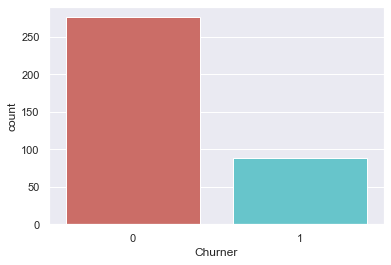

In [11]:
sns.countplot(x=df['Churner'], data=df, palette = 'hls')


# OVERSAMPLE

Aplies SMOTE to the minority class

In [12]:
#!pip install imbalanced-learn

In [13]:
# for reproducibility purposes
seed = 13
# SMOTE number of neighbors
k = 3

sm = SMOTE(sampling_strategy={1:142}, k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X_train, y_train)


# Data transformation

Double checking the class distribution

In [14]:
X_train,y_train = X_res, y_res


In [15]:
print(y_train['Churner'].value_counts())
print(y_test['Churner'].value_counts())
print(y_val['Churner'].value_counts())

0    192
1    142
Name: Churner, dtype: int64
0    46
1    16
Name: Churner, dtype: int64
0    38
1    17
Name: Churner, dtype: int64


# Build Naive Bayes

In [62]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
y_main = y_main.values.ravel()

0.6065573770491803
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        46
           1       0.33      0.60      0.43        15

    accuracy                           0.61        61
   macro avg       0.58      0.60      0.56        61
weighted avg       0.70      0.61      0.63        61



array([[28, 18],
       [ 6,  9]], dtype=int64)

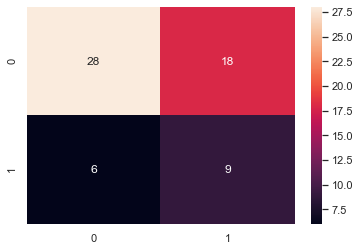

In [63]:
classifer_NB = GaussianNB() 
classifer_NB.fit(X_train, y_train)
prediction_NB = classifer_NB.predict(X_test)

print(accuracy_score(y_test,prediction_NB))
print(classification_report(y_test, prediction_NB))
conf_matrix_NB = confusion_matrix(y_test, prediction_NB)
sns.heatmap(conf_matrix_NB, annot=True)
conf_matrix_NB

# Feature Importance according to Naive Bayes

In [64]:
imps = permutation_importance(classifer_NB, X_test, y_test)
print(imps.importances_mean)

[-0.01639344 -0.01639344 -0.00655738  0.00655738  0.         -0.00655738
 -0.00655738 -0.00655738  0.01311475 -0.01967213  0.00327869 -0.00655738
  0.00983607 -0.00327869  0.00327869]


# Increase accuracy NB

In [65]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=13)
classifer_NB2 = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=classifer_NB2, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='recall')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [66]:
gs_NB.best_params_

{'var_smoothing': 0.533669923120631}

In [67]:
gs_NB.best_score_

0.5111111111111111

In [68]:
# predict the target on the test dataset
prediction_NB_imp = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,prediction_NB_imp)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7049180327868853


              precision    recall  f1-score   support

           0       0.94      0.65      0.77        46
           1       0.45      0.87      0.59        15

    accuracy                           0.70        61
   macro avg       0.69      0.76      0.68        61
weighted avg       0.82      0.70      0.73        61

accuracy_score on test dataset :  0.7049180327868853


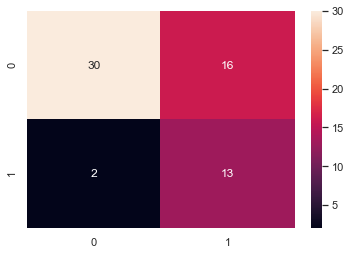

In [69]:
conf_matrix_NB_imporved = confusion_matrix(y_test, prediction_NB_imp)
sns.heatmap(conf_matrix_NB_imporved, annot=True)
print(classification_report(y_test, prediction_NB_imp))
print('accuracy_score on test dataset : ', accuracy_test)

# Apply best result to validation set take aside from original data

0.7592592592592593
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        44
           1       0.29      0.20      0.24        10

    accuracy                           0.76        54
   macro avg       0.56      0.54      0.55        54
weighted avg       0.73      0.76      0.74        54



C:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([[39,  5],
       [ 8,  2]], dtype=int64)

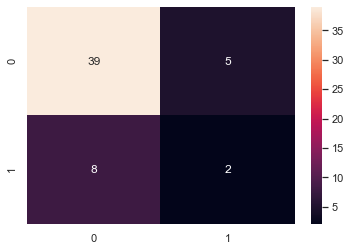

In [70]:
validate_NB = gs_NB.predict(X_val)

print(accuracy_score(y_val,validate_NB))
print(classification_report(y_val, validate_NB))
conf_matrix_val_nb = confusion_matrix(y_val, validate_NB)
sns.heatmap(conf_matrix_val_nb, annot=True)
conf_matrix_val_nb

In [71]:
cohen_kappa_score(y_val, validate_NB)

0.09768637532133684

# Build RF

ACCURACY OF THE MODEL:  0.7377049180327869
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        46
           1       0.46      0.40      0.43        15

    accuracy                           0.74        61
   macro avg       0.64      0.62      0.63        61
weighted avg       0.73      0.74      0.73        61



array([[39,  7],
       [ 9,  6]], dtype=int64)

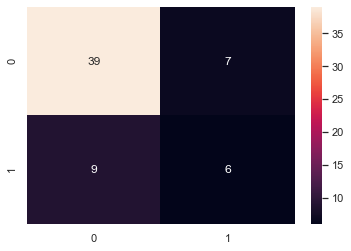

In [72]:
from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators=150, random_state=5)
#ensemble.RandomForestClassifier(n_estimators=100)#,class_weight={0:4,1:1})
random_forest.fit(X_train,y_train);
prediction_rf = random_forest.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction_rf))

print(classification_report(y_test, prediction_rf))

conf_matrix_rf = confusion_matrix(y_test, prediction_rf)
sns.heatmap(conf_matrix_rf, annot=True)
conf_matrix_rf

# Feature importance according to Random Forest 

In [73]:
imps_rf = permutation_importance(random_forest, X_test, y_test)
print(imps_rf.importances_mean)

[ 4.26229508e-02  1.31147541e-02  6.55737705e-03  4.59016393e-02
  2.29508197e-02 -1.63934426e-02  4.44089210e-17 -3.27868852e-03
  6.55737705e-03  1.96721311e-02  6.55737705e-03 -6.55737705e-03
  4.44089210e-17 -1.63934426e-02  1.96721311e-02]


# Increase accuracy RF

In [74]:
# Number of trees in random forest
n_estimators = [45, 75, 100] #[int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['log2',0.3,0.5, 'sqrt']
# Maximum number of levels in tree
max_depth = [28, 36, 40]
# Minimum number of samples required to split a node
min_samples_split = [2,3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [50,60,70]
# Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]

In [75]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [45, 75, 100], 'max_features': ['log2', 0.3, 0.5, 'sqrt'], 'max_depth': [28, 36, 40], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [50, 60, 70], 'bootstrap': [True, False]}


In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
skf = StratifiedKFold(n_splits=5)

In [77]:
random_forest_improved = BalancedRandomForestClassifier(n_estimators=150, random_state=2)
rf_Grid = GridSearchCV(estimator = random_forest_improved, param_grid = param_grid, cv = skf, 
                       verbose=2, n_jobs = -1, scoring='recall')
rf_Grid.fit(X_main, y_main)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=BalancedRandomForestClassifier(n_estimators=150,
                                                      random_state=2),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [28, 36, 40],
                         'max_features': ['log2', 0.3, 0.5, 'sqrt'],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [45, 75, 100]},
             scoring='recall', verbose=2)

In [78]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 28,
 'max_features': 'log2',
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'n_estimators': 75}

ACCURACY OF THE MODEL:  0.5737704918032787
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        46
           1       0.31      0.60      0.41        15

    accuracy                           0.57        61
   macro avg       0.56      0.58      0.54        61
weighted avg       0.69      0.57      0.60        61



array([[26, 20],
       [ 6,  9]], dtype=int64)

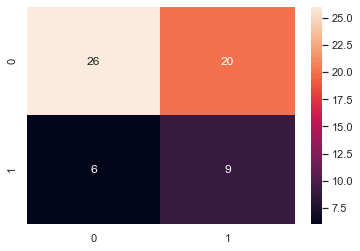

In [79]:
# COPY THE ABOVE BEST PARAMETERS **rf_Grid.best_params_
random_forest2 = BalancedRandomForestClassifier(n_estimators=75, random_state=5, bootstrap= True,
                                              max_depth=28,max_features= 'log2',min_samples_leaf=50,
                                              min_samples_split =2)
random_forest2.fit(X_main,y_main);

prediction_rf2 = random_forest2.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction_rf2))

print(classification_report(y_test, prediction_rf2))

conf_matrix_rf = confusion_matrix(y_test, prediction_rf2)
sns.heatmap(conf_matrix_rf, annot=True)
conf_matrix_rf

# Apply best RF model to validation set

ACCURACY OF THE MODEL:  0.46296296296296297
              precision    recall  f1-score   support

           0       0.86      0.41      0.55        44
           1       0.21      0.70      0.33        10

    accuracy                           0.46        54
   macro avg       0.53      0.55      0.44        54
weighted avg       0.74      0.46      0.51        54



array([[18, 26],
       [ 3,  7]], dtype=int64)

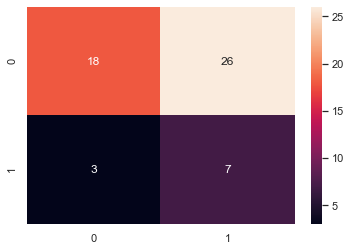

In [80]:
validate_rf = random_forest2.predict(X_val)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_val, validate_rf))

print(classification_report(y_val, validate_rf))

conf_matrix_val_rf = confusion_matrix(y_val, validate_rf)
sns.heatmap(conf_matrix_val_rf, annot=True)
conf_matrix_val_rf

In [81]:
cohen_kappa_score(y_val, validate_rf)

0.0577617328519856

# Build XGBOOST

In [82]:
XGBoost = xgb.XGBClassifier()
XGBoost.fit(X_train, y_train)
print(); print(XGBoost)
expected_y  = y_test
predicted_y = XGBoost.predict(X_test)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        46
           1       0.40      0.40      0.40        15

    accuracy                           0.70        61
   macro avg       0.60      0.60      0.60        61
weighted avg       0.70      0.70      0.70        61



array([[37,  9],
       [ 9,  6]], dtype=int64)

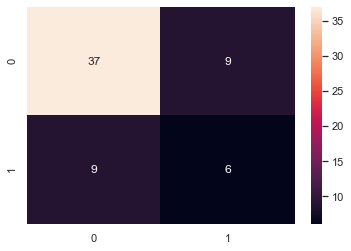

In [83]:
expected_y  = y_test
predicted_y = XGBoost.predict(X_test)
print(metrics.classification_report(expected_y, predicted_y))
xgb_metrics = metrics.confusion_matrix(expected_y, predicted_y)
sns.heatmap(xgb_metrics, annot=True)
xgb_metrics

In [84]:
imps_xgboost = permutation_importance(XGBoost, X_test, y_test)
print(imps_xgboost.importances_mean)

[ 0.01967213 -0.00327869 -0.00983607  0.03278689 -0.03278689 -0.05901639
 -0.04590164 -0.02295082 -0.01967213 -0.00655738 -0.00327869  0.
 -0.01639344 -0.04590164 -0.02622951]


In [85]:
XGBoost.get_booster().get_score(importance_type="gain")


{'damagePerMinute': 1.4771541357040405,
 'kills': 0.8656132221221924,
 'goldPerMinute': 0.646615743637085,
 'firstTowerAssist': 1.2606620788574219,
 'killingSprees': 1.1869357824325562,
 'inhibitorTakedowns': 0.8529469966888428,
 'wardsKilled': 0.6738532185554504,
 'timePlayed': 0.7708950638771057,
 'firstBloodAssist': 0.6789265871047974,
 'assists': 0.4648399353027344,
 'firstTowerKill': 0.6991549730300903,
 'gameLength': 0.020114123821258545,
 'deaths': 0.6897481083869934,
 'champExperience': 1.0313782691955566,
 'bountyLevel': 1.4742891788482666}

# Improve XGBOOST 

In [86]:
param_grid = {
    "max_depth": [4, 5, 8],
    "min_child_weight": [0.5, 1, 2],
    "learning_rate": [0.18, 0.15, 0.12],
    "gamma": [0.12, 0.14],
    "reg_lambda": [0.85, 0.75, 0.65],
    "scale_pos_weight": [6,7,8],
    "subsample": [0.7],
    "colsample_bytree": [0.5],
    "n_estimators": [50, 100],
    #"max_delta_step":[2],
}

In [87]:
# Init classifier
xgb_cl = xgb.XGBClassifier()

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [88]:
 grid_cv.best_score_

0.8586726599682707

In [89]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.14,
 'learning_rate': 0.12,
 'max_depth': 5,
 'min_child_weight': 0.5,
 'n_estimators': 50,
 'reg_lambda': 0.75,
 'scale_pos_weight': 8,
 'subsample': 0.7}

ACCURACY OF THE MODEL:  0.7049180327868853
              precision    recall  f1-score   support

           0       0.83      0.76      0.80        46
           1       0.42      0.53      0.47        15

    accuracy                           0.70        61
   macro avg       0.63      0.65      0.63        61
weighted avg       0.73      0.70      0.72        61



array([[35, 11],
       [ 7,  8]], dtype=int64)

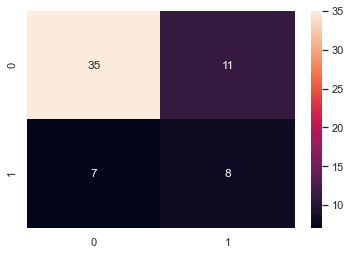

In [90]:
XGBoost_imp = xgb.XGBClassifier(**grid_cv.best_params_)

XGBoost_imp.fit(X_train, y_train)

prediction_XGBoost_imp = XGBoost_imp.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction_XGBoost_imp))
print(classification_report(y_test, prediction_XGBoost_imp))


conf_matrix_xgb_imp = confusion_matrix(y_test, prediction_XGBoost_imp)
sns.heatmap(conf_matrix_xgb_imp, annot=True)
conf_matrix_xgb_imp

# Apply best xgboost to validation dataset

ACCURACY OF THE MODEL:  0.7407407407407407
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.39      0.70      0.50        10

    accuracy                           0.74        54
   macro avg       0.65      0.72      0.66        54
weighted avg       0.82      0.74      0.76        54



array([[33, 11],
       [ 3,  7]], dtype=int64)

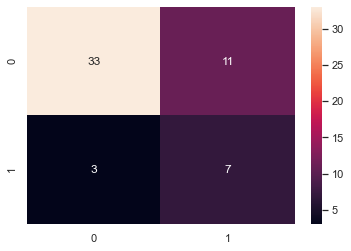

In [91]:
validate_xgboost = XGBoost_imp.predict(X_val)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_val, validate_xgboost))
print(classification_report(y_val, validate_xgboost))


conf_matrix_val_xgboost = confusion_matrix(y_val, validate_xgboost)
sns.heatmap(conf_matrix_val_xgboost, annot=True)
conf_matrix_val_xgboost

In [92]:
cohen_kappa_score(y_val, validate_xgboost)

0.34375

# Evaluation metrics - ROC-AUC graph

# Naive Bayes

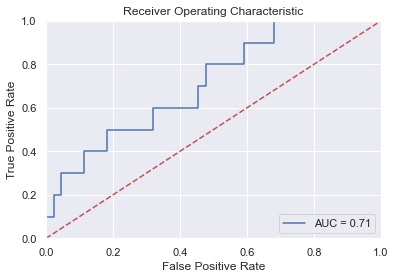

In [93]:
probs = classifer_NB.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

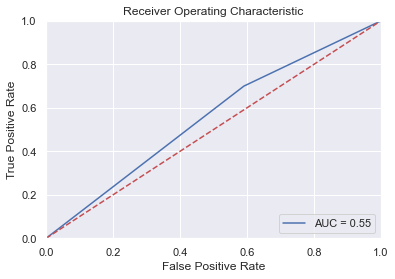

In [94]:
probs = random_forest2.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBOOST

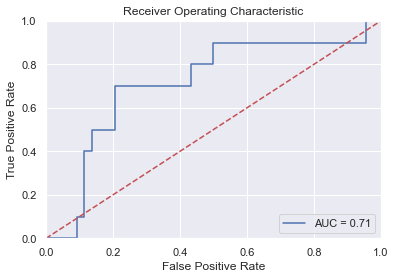

In [95]:
probs = XGBoost_imp.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Calculate F-2 scores

# Naive Bayes F-2 score 

In [96]:
fbeta_score(y_val, validate_NB, average='macro', beta=2)

0.5436027096651083

# Random Forest F-2 score 

In [97]:
fbeta_score(y_val, validate_rf, average='macro', beta=2)

0.46815242333634655

# XGBOOST F-2 score 

In [98]:
fbeta_score(y_val, validate_xgboost, average='macro', beta=2)

0.6908750813272608

# Feature Selection from RF for repeating the experiment 

In [53]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

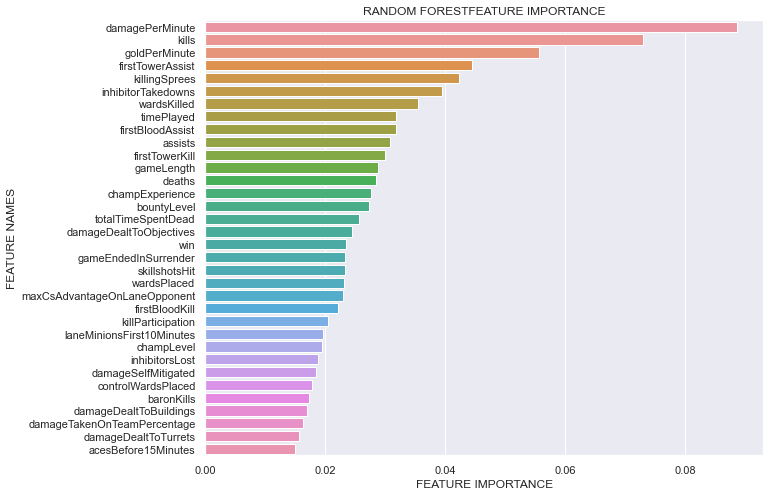

In [54]:
plot_feature_importance(random_forest.feature_importances_,X_train.columns,'RANDOM FOREST')


# Create a dataset with the top 15 features and reapply the models

In [55]:
df = df.loc[~((df['champExperience'] == 0))]

In [56]:
df = df[['damagePerMinute','kills','goldPerMinute','firstTowerAssist','killingSprees','inhibitorTakedowns',
                         'wardsKilled','timePlayed','firstBloodAssist','assists','firstTowerKill',
                           'gameLength', 'deaths','champExperience','bountyLevel','Churner']]

In [57]:
df

,damagePerMinute,kills,goldPerMinute,firstTowerAssist,killingSprees,inhibitorTakedowns,wardsKilled,timePlayed,firstBloodAssist,assists,firstTowerKill,gameLength,deaths,champExperience,bountyLevel,Churner
0,-1922.45,0.72,-38.20,-3.90,0.18,0.34,0.55,134.00,-9.09,-3.41,14.61,133.82,-2.22,93.04,0.29,0
1,-1079.40,-1.92,-145.86,-25.00,-0.71,0.10,1.21,355.56,-10.41,0.84,-4.17,355.53,0.27,-885.29,-0.04,0
2,-943.49,-1.14,-114.87,-11.54,-0.24,-0.22,0.38,456.75,-12.82,-3.54,3.20,456.60,-2.08,97.28,0.29,0
3,-203.08,-1.74,-18.89,10.42,-0.57,-0.24,0.25,-141.00,16.67,-0.47,-2.08,-141.14,-0.63,-1722.50,0.62,0
4,-454.27,-0.42,-22.99,-10.34,-0.09,-0.16,0.16,60.34,-4.31,-1.82,-1.15,60.51,1.93,-486.78,-0.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-202.88,-1.77,-41.12,-9.28,-0.64,0.51,1.77,316.96,18.90,6.62,3.18,316.90,0.36,1867.60,-0.54,0
361,31.33,-0.91,-8.96,-2.25,-0.35,-0.19,-0.56,-94.99,0.46,-0.55,4.78,-95.14,-0.57,-777.30,-0.11,0
362,-1490.42,-1.17,-56.89,-2.27,-0.17,-0.20,0.00,120.14,-11.36,-1.11,-1.51,120.66,-0.43,-522.24,-0.22,1
363,-1752.73,1.55,80.98,2.53,0.45,0.02,0.22,-119.69,6.53,-0.20,-2.90,-119.64,0.81,776.90,0.66,0


In [58]:
y=df.loc[:,df.columns=='Churner']
X=df.loc[:,df.columns!='Churner']

X_main,X_val,y_main,y_val = train_test_split(X,y, test_size=0.15, random_state=14) #to assess final model, this will undergo SMOTE


X_train,X_test,y_train,y_test = train_test_split(X_main,y_main, test_size=0.20, random_state=12) #to train and test models

X_test.shape
X_train.shape
X_val.shape
columns = X_train.columns

print(y_train['Churner'].value_counts())
print(y_test['Churner'].value_counts())
print(y_val['Churner'].value_counts())

0    184
1     57
Name: Churner, dtype: int64
0    46
1    15
Name: Churner, dtype: int64
0    44
1    10
Name: Churner, dtype: int64


In [59]:
# for reproducibility purposes
seed = 13
# SMOTE number of neighbors
k = 3

sm = SMOTE(sampling_strategy={1:114}, k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [60]:
X_train,y_train = X_res, y_res

In [61]:
print(y_train['Churner'].value_counts())
print(y_test['Churner'].value_counts())
print(y_val['Churner'].value_counts())

0    184
1    114
Name: Churner, dtype: int64
0    46
1    15
Name: Churner, dtype: int64
0    44
1    10
Name: Churner, dtype: int64


# Go back at cell "Build Naive Bayes" and run again the code
This time only the top 15 features are in the training data!